In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import os
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split as tts 
from sklearn.linear_model import LogisticRegression as lr 

os.chdir("C:\\Users\\tirth\\Technocolabs\\project 2\\Data set")

df = pd.read_csv('cleaned_data.csv')

train_x, test_x, train_y, test_y = tts(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [3]:
print (train_x.shape)
print (train_y.shape)
print (test_x.shape)
print (test_y.shape)

(21331, 1)
(21331,)
(5333, 1)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [4]:
model = lr(C=0.1, class_weight=None, dual=False, fit_intercept=True, 
                                intercept_scaling=1, max_iter=100, n_jobs=None, 
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, 
                                verbose=0, warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [5]:
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
pred_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
model.intercept_

array([-1.39260028])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [29]:
print("Training Score :",model.score(train_x,train_y))
print("Testing Score :",model.score(test_x,test_y))

from sklearn.metrics import accuracy_score
print("Training Accuracy",accuracy_score(train_x,train_y))
print("Testing Accuracy",accuracy_score(test_x,test_y))

Training Score : 0.776897473161127
Testing Score : 0.7834239639977498
Training Accuracy 0.06947634897566922
Testing Accuracy 0.06431651978248641


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_y)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [11]:
y_pred_proba = model.predict_proba(test_x)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [12]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

_________________________________________________________________________
**Now, plot the ROC curve.**


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
fpr, tpr, t = roc_curve(test_y, pos_proba)

print ("Flase Positive Rate : ", fpr)
print ("True Positive Rate : ",tpr)
print ("Threshold : ",t)

Flase Positive Rate :  [0.         0.01842987 0.16419339 0.63140258 1.        ]
True Positive Rate :  [0.         0.004329   0.21212121 0.7030303  1.        ]
Threshold :  [1.2549944  0.2549944  0.24007604 0.22576598 0.21207085]


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'ROC curve')

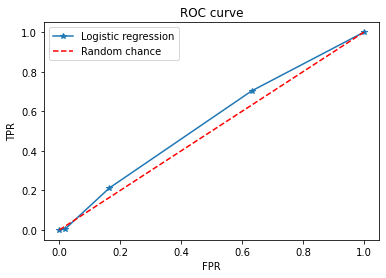

In [22]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [25]:
from sklearn.metrics import roc_auc_score
print("Area under ROC-AUC cureve : ",roc_auc_score(test_y, pos_proba))

Area under ROC-AUC cureve :  0.5434650477972642


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [28]:
train_pos = test_y == 1

In [ ]:
fpr, tpr, t = roc_curve(train_y, pos_proba)

print ("Flase Positive Rate : ", fpr)
print ("True Positive Rate : ",tpr)
print ("Threshold : ",t)

    How is this different, conceptually and quantitatively, from your earlier calculation?
